In [33]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sns.set()
%matplotlib inline

endangered_languages = pd.read_csv('./data_sets/endangered_languages_ML.csv')
endangered_languages.head()

,Language,Speakers,Fertility Rate Avg,2018 Rank,2018 Score,Number of Countries Spoken,GDP Average (Current US $),The former Yugoslav Republic of Macedonia,Ethiopia,Costa Rica,...,Venezuela (Bolivarian Republic of),Sri Lanka,Argentina,Uzbekistan,Senegal,Critically endangered,Definitely endangered,Extinct,Severely endangered,Vulnerable
0,South Italian,7500000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Sicilian,5000000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Lombard,3500000.0,1.714074,35.0,55.77,2,944337429320,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Emilian-Romagnol,2000000.0,1.714074,35.0,55.77,2,944337429320,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Piedmontese,2000000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
X = endangered_languages.drop(['Language', 'Extinct'], axis=1)
y = endangered_languages[['Extinct']]

In [56]:
print(X.shape)
print(y.shape)

(1933, 160)
(1933, 1)


In [57]:
X.head()

,Speakers,Fertility Rate Avg,2018 Rank,2018 Score,Number of Countries Spoken,GDP Average (Current US $),The former Yugoslav Republic of Macedonia,Ethiopia,Costa Rica,Sudan,...,Fiji,Venezuela (Bolivarian Republic of),Sri Lanka,Argentina,Uzbekistan,Senegal,Critically endangered,Definitely endangered,Severely endangered,Vulnerable
0,7500000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5000000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3500000.0,1.714074,35.0,55.77,2,944337429320,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2000000.0,1.714074,35.0,55.77,2,944337429320,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2000000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
lm = LinearRegression()

In [59]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1546, 160) (1546, 1)
(387, 160) (387, 1)


In [60]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
print('The intercept is {}'.format(lm.intercept_))
print('The coefficients are {} \n'.format(lm.coef_))

The intercept is [0.95997129]
The coefficients are [[-6.65228709e-10  1.95114111e-04  2.77712837e-05  6.75144440e-04
  -1.16777848e-03 -1.49880108e-15 -1.69466675e-02  1.40226407e-02
   4.51638457e-03 -1.76836374e-03 -1.35682438e-03  4.22157490e-03
   1.01861521e-02  1.75207071e-15 -3.82144834e-02 -2.49800181e-16
  -5.27355937e-16 -1.62462023e-03  3.92555647e-03 -2.57432964e-15
   5.55111512e-16  7.77156117e-16  4.42746172e-03  7.50724468e-04
   4.44089210e-16  2.22044605e-16  2.57065234e-03  3.99381167e-03
  -7.23686286e-04 -1.94399257e-03 -2.30358626e-02  8.64847421e-03
   4.16333634e-17  8.32667268e-17 -2.77555756e-17  8.32667268e-17
   1.09842802e-02  3.68486539e-03  6.14310495e-03 -3.67640121e-03
   5.62690434e-03 -3.04189056e-02  1.47844663e-02  1.36863180e-02
   7.63278329e-17  0.00000000e+00 -8.18781833e-02  6.93889390e-17
  -5.35597205e-03  1.67082428e-02  1.27553002e-02  1.34566082e-02
  -8.93021966e-03  2.02130774e-02  1.09842802e-02  5.03069808e-17
   3.78389577e-03 -1.3877

In [71]:
import itertools
flattened_coef  = list(itertools.chain(*lm.coef_))
len(flattened_coef)

160

In [73]:
coeff_df = pd.DataFrame(flattened_coef, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Speakers,-6.652287e-10
Fertility Rate Avg,1.951141e-04
2018 Rank,2.777128e-05
2018 Score,6.751444e-04
Number of Countries Spoken,-1.167778e-03
GDP Average (Current US $),-1.498801e-15
The former Yugoslav Republic of Macedonia,-1.694667e-02
Ethiopia,1.402264e-02
Costa Rica,4.516385e-03
Sudan,-1.768364e-03


In [74]:
y_pred = lm.predict(X_test)

In [78]:
flattened_pred  = list(itertools.chain(*y_pred))

In [90]:
# df = pd.DataFrame({'Actual': y_test, 'Predicted': flattened_pred})  
# df

In [91]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.005480405035995819
Mean Squared Error: 6.634733544712026e-05
Root Mean Squared Error: 0.008145387372440936


Text(0, 0.5, 'Predictions')

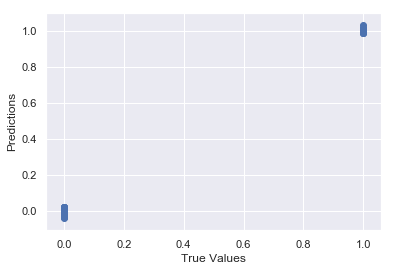

In [93]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [94]:
print('Score: {}'.format(lm.score(X_test, y_test)))

Score: 0.9993893329595268


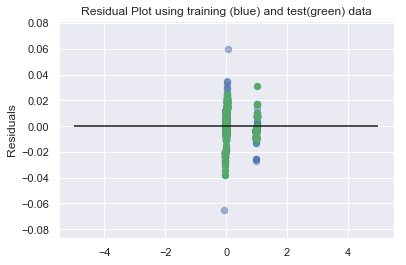

In [97]:
# Residuals plot
_ = plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
_ = plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g', s=40)
_ = plt.hlines(y=0, xmin=-5, xmax=5)
_ = plt.title('Residual Plot using training (blue) and test(green) data')
_ = plt.ylabel('Residuals')
plt.show()